In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from photutils.aperture import aperture_photometry,CircularAnnulus, CircularAperture
from astropy.wcs import WCS

import numpy as np
from glob import glob
from astropy.io import fits 

from scipy.optimize import curve_fit

from datetime import datetime

In [2]:
SampleData = glob('SampleGalaxyData/*')
print(np.shape(SampleData))

(23,)


In [10]:
image=fits.open(SampleData[5])[0]
#image.header

In [9]:
wcs = WCS(image.header, relax=True)

ValueError: Internal error in wcslib header parser:
 RADECSYS= 'FK5' / RADECSYS                                                      
  Rejected (1), the RADECSYS keyword is deprecated, use RADESYSa.


In [6]:
pixel_values = image[0].data

wcs = WCS(image[0].header)

plt.subplot(projection=wcs)
plt.imshow(pixel_values, vmin=80, vmax=200)
plt.colorbar()
positions = [(925, 1420)]
plt.scatter(positions[0][0],positions[0][1], marker='.')

 [astropy.io.fits.verify]


ValueError: Internal error in wcslib header parser:
 RADECSYS= 'FK5' / RADECSYS                                                      
  Rejected (1), the RADECSYS keyword is deprecated, use RADESYSa.


In [13]:
#Take Uncertainty by using different regions of outside galaxy for background count

A=[]

mean_bkg1=np.mean(pixel_values[0:500,0:500])
mean_bkg2=np.mean(pixel_values[0:500,1548:2048])
mean_bkg3=np.mean(pixel_values[1548:2048,0:500])
mean_bkg4=np.mean(pixel_values[1548:2048,1748:2048])
mean_bkg5=np.mean(pixel_values[0:500,1750:2000])
mean_bkg6=np.mean(pixel_values[1500:2048,750:1250])

def AngularSize(bkg):
    x=[]
    y=[]
    c=[]
    d=[]
    #Divide image into regions of 5x5 pixels and take average value in those regions
    #Going down each column and finding all pixels above the mean background rate outside the galaxy and counting how many are
    #consecutive, longest chain is galaxy.
    a=0
    j=0
    while j<2048:
        i=0
        while i<2048:
            count=np.mean(pixel_values[i:i+5:,j:j+5])
            if count > bkg:
                a+=1
                x.append(i)
            else:
                c.append(a)
                a=0
            i+=5
        j+=5


    a=0
    i=0
    while i<2048:
        j=0
        while j<2048:
            count=np.mean(pixel_values[i:i+5:,j:j+5])
            if count > bkg:
                a+=1
                y.append(j)
            else:
                d.append(a)
                a=0
            j+=5
        i+=5

    #Setting Major
    Ax=np.max(c)*5
    Ay=np.max(d)*5

    return Ax,Ay

A.append(AngularSize(mean_bkg1))
A.append(AngularSize(mean_bkg2))
A.append(AngularSize(mean_bkg3))
A.append(AngularSize(mean_bkg4))
A.append(AngularSize(mean_bkg5))
A.append(AngularSize(mean_bkg6))


Galaxy has an angular size of 4.2 +/- 1.2 x 4.0 +/- 1.1 arcmins


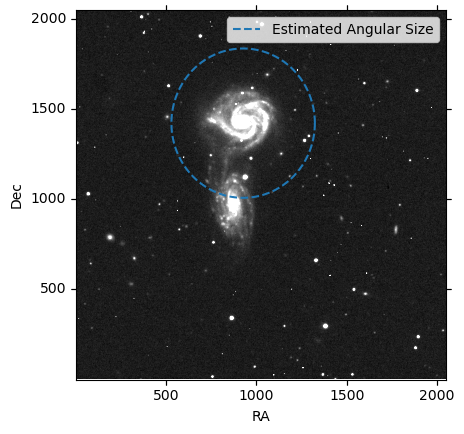

In [14]:
t = np.linspace(0,2*np.pi,2000)

x1=positions[0][0]
y1=positions[0][1]

Ax=np.mean(A[:][0])
Ay=np.mean(A[:][1])

dAx=np.std(A[:][0])
dAy=np.std(A[:][1])

#Coverting to arcmin
Minor= Ay*0.304/60
Major=Ax*0.304/60

dMinor=dAy*0.304/60
dMajor=dAx*0.304/60

print("Galaxy has an angular size of %.1f +/- %.1f x %.1f +/- %.1f" % (Major,dMajor,Minor,dMinor), 'arcmins')

image= fits.open('V1_img_calib.fits')
wcs = WCS(image[0].header)

plt.subplot(projection=wcs)

plt.plot(x1+(Ay/2)*np.cos(t),y1+(Ax/2)*np.sin(t),'--', label='Estimated Angular Size')

plt.imshow(pixel_values, cmap='gray', vmin=50, vmax=110)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.legend(loc='best')

In [15]:
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
from astropy import coordinates as coords
from astroquery.sdss import SDSS
from astropy.wcs import WCS

pos = coords.SkyCoord(ra=189.183288812633, dec=14.6450833, unit="deg")
xid = SDSS.query_region(pos, radius='5 arcsec', spectro=True)

print(np.shape(xid))


(1,)
